# Customer Eligibility for Loan

# Hypothesis Generation

- Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
- Income: Applicants with higher income should have more chances of loan approval
- Loan amount: If the loan amount is less, the chances of loan approval should be high
- Loan term: Loans with shorter time period should have higher chances of approval
- Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high


# Applying the Pipeline Of Machine Learnig Project
- 1. Data Analysis
- 2. Feature Engineering
- 3. Feature Selection
- 4. Model Building
- 5. Model Deploymnet

# 1. Exploratory Data Analysis (EDA)

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the train and test dataset
train = pd.read_csv('C:/Users/hp/Desktop/ml/Loan-Prediction-master/train.csv')
test = pd.read_csv('C:/Users/hp/Desktop/ml/Loan-Prediction-master/test.csv')

In [3]:
# copy of original data
train_original = train.copy()
test_original = test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
# train test split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

Note: There are 13 feature and 614 rows in train dataset and 12 feature and 367 rows in test dataset, and train-test-split ratio of 63% and 37%.

In [8]:
#train data 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#test Data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
# Checking the null value in train and test data
# train data set
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# test data set
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

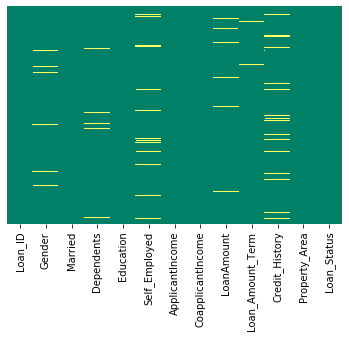

In [12]:
# vizualize 'train dataset' null value using heat-map
sns.heatmap(train.isnull(), yticklabels = False, cbar = False ,cmap='summer')

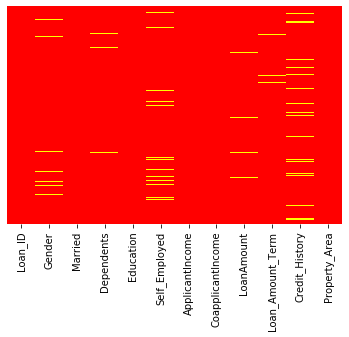

In [13]:
# vizualize 'test dataset' null value using heat-map
sns.heatmap(test.isnull(), yticklabels = False, cbar = False,cmap="autumn" )

**Note**: From above graph it can be vizualise that there is lot of null value in our train and test dataset

In [14]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AC4E419C8>,
      dtype=object)

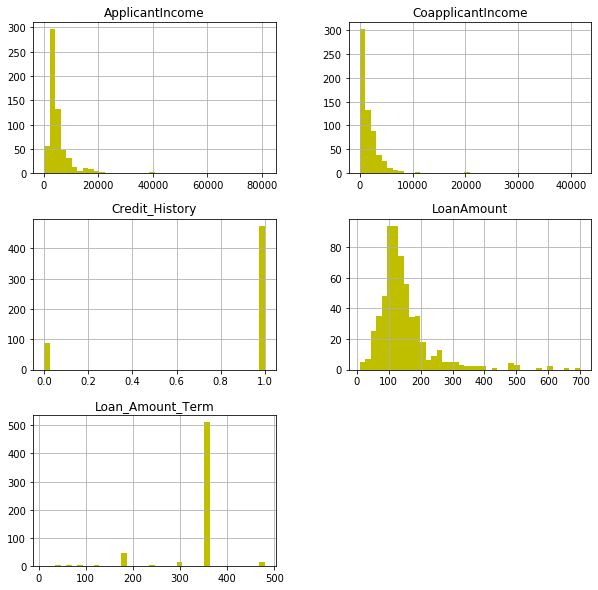

In [15]:
train.hist(figsize = (10,10),color="y",bins=40,alpha=1)

### Target variable

In [16]:
# target variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# percentage distribution of 'Loan_Status'
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

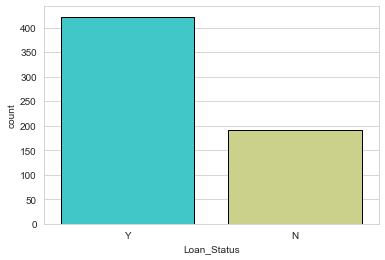

In [18]:
sns.set_style('whitegrid')
sns.countplot('Loan_Status', data = train,palette='rainbow',edgecolor=(0,0,0))

# Independent Variable (Categorical)

### Gender

In [19]:
# Gender
train['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

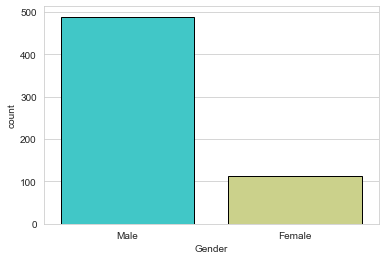

In [20]:
sns.set_style('whitegrid')
sns.countplot('Gender', data = train,palette='rainbow',edgecolor=(0,0,0))

### Married

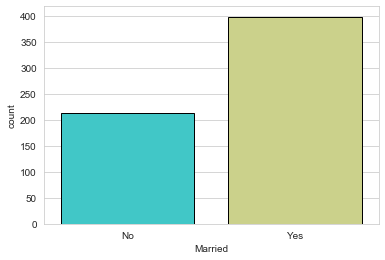

In [21]:
sns.set_style('whitegrid')
sns.countplot('Married', data = train,palette='rainbow',edgecolor=(0,0,0))

### Education

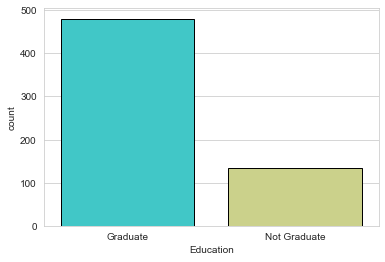

In [22]:
sns.set_style('whitegrid')
sns.countplot('Education', data = train,palette='rainbow',edgecolor=(0,0,0))

In [23]:
train['Education'].value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

### Self Employed

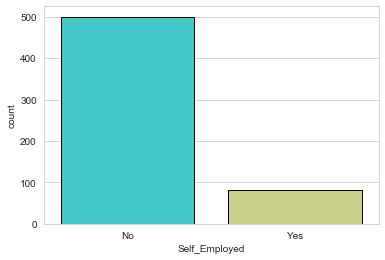

In [24]:
sns.set_style('whitegrid')
sns.countplot('Self_Employed', data = train,palette='rainbow',edgecolor=(0,0,0))

In [25]:
train['Self_Employed'].value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

### Credit History

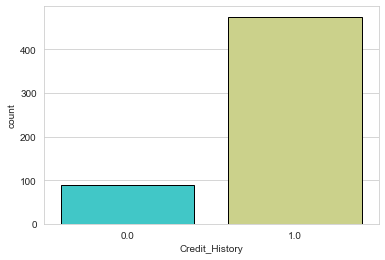

In [26]:
sns.set_style('whitegrid')
sns.countplot('Credit_History', data = train,palette='rainbow',edgecolor=(0,0,0))

In [27]:
train['Credit_History'].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

So from the above plot and value count analysis it can be says that
- 81% applicant are male in dataset.
- 65% appliant are married in dataset.
- 80% applicants are Graduate.
- 15% applicants are self employed.
- 85% applicants have credit history.

 

# Ordinal Variable 

### Dependents

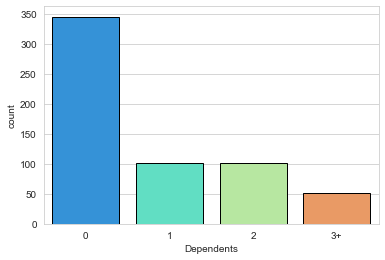

In [28]:
#Dependents
sns.set_style('whitegrid')
sns.countplot('Dependents', data = train,palette='rainbow',edgecolor=(0,0,0))

### Property Area

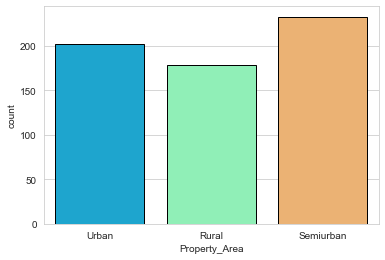

In [29]:
#Property_Area
sns.set_style('whitegrid')
sns.countplot('Property_Area' ,data = train,palette='rainbow',edgecolor=(0,0,0))

From above it can be concluded that
- Most of the applicant have no dependents
- Majority of the applicants belong from SemiUrban region

# Numerical Variable 

### Applicant Income

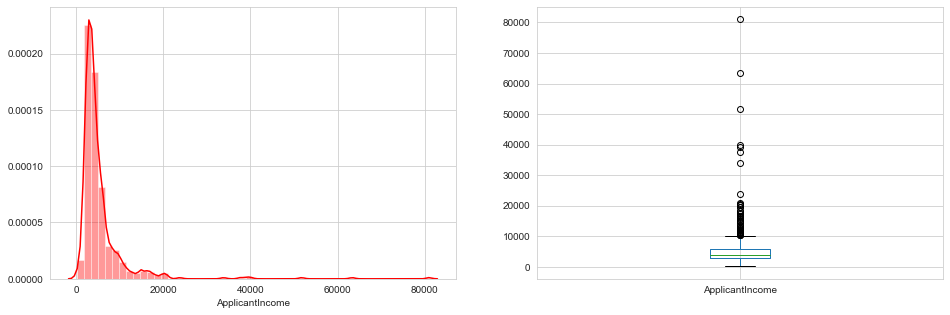

In [30]:
#ApplicantIncome
plt.subplot(121)
sns.distplot(train['ApplicantIncome'],color="r");

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

NOTE: We can observe that applicant income is towards left which means it is not normally distributed. Right skewed distribution.
Boxplot helps us to observe that there are a lot of outliers.

### Coapplicant

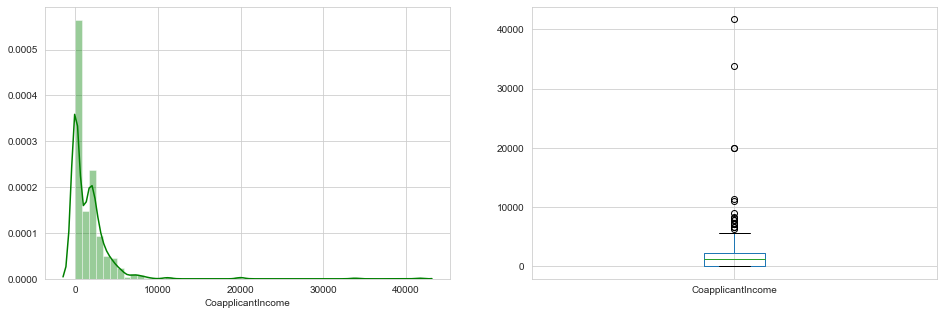

In [31]:

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'],color="g");

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Same analysis as in previous case

### Loan_Amount_Term

In [32]:
train['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [33]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

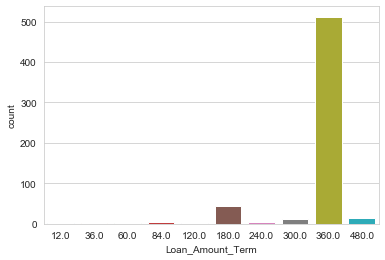

In [34]:
sns.countplot('Loan_Amount_Term', data = train)

Around 86% Loan term is of 360 month

# Bivariate Analysis
Exploring variable with respect to target variable and categorical Independent variables

## Categorical Independent Variable vs Target Variable

### Gender vs Loan_Status 

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


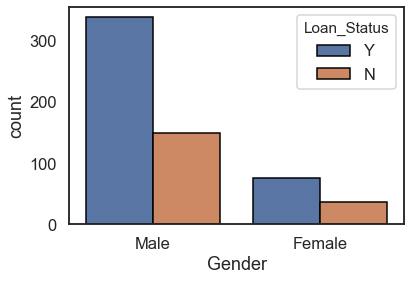

In [35]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Gender",hue="Loan_Status",data=train,edgecolor=(0,0,0))

### Married vs Loan_Status

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


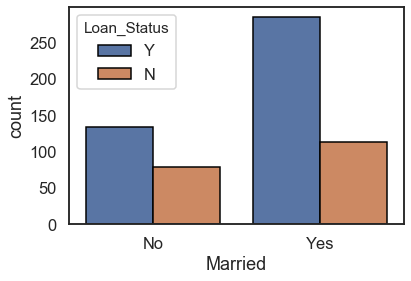

In [36]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Married', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

### Dependents vs Loan_Status

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


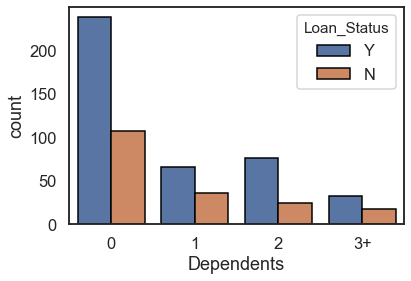

In [37]:
print(pd.crosstab(train['Dependents'], train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Dependents', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

### Education vs Loan_Status

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


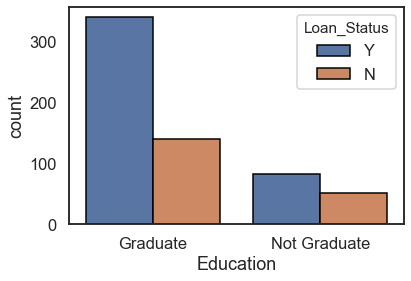

In [38]:
print(pd.crosstab(train['Education'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Education', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

### Self_Employed vs Loan_Status

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


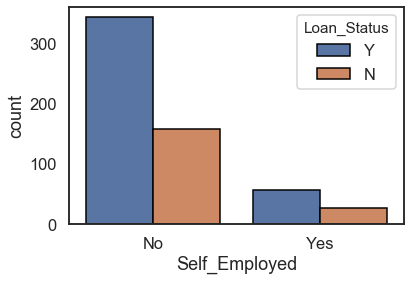

In [39]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Self_Employed', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

### Credit_History vs Loan_Status

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


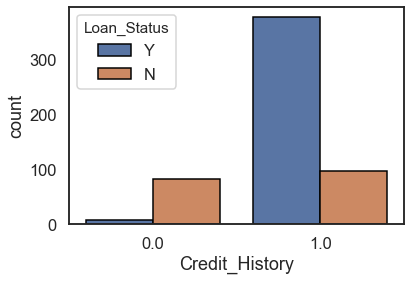

In [40]:

print(pd.crosstab(train['Credit_History'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Credit_History', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

### Property_Area vs Loan_Status

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


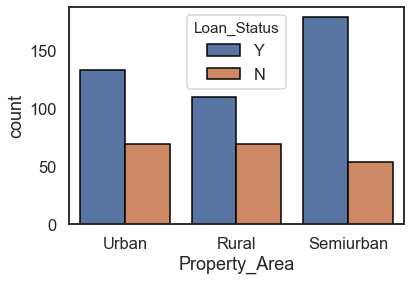

In [41]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot('Property_Area', hue ='Loan_Status', data = train,edgecolor=(0,0,0))

From the above chart, it can be says that:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- proportion of loans getting approved for graduates is higher compared to non-graduates
- it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical vs Target Variable

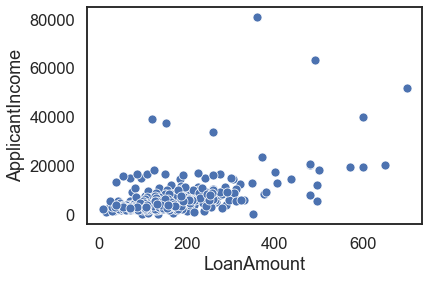

In [42]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train)

# Assigning Flag to categorical variable 

In [43]:
# Gender
train_original['Gender'].unique() 

array(['Male', 'Female', nan], dtype=object)

In [44]:
train['Gender'] = train['Gender'].map({'Male':1,'Female':0})

In [45]:
# Married
train_original['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
train['Married'] = train['Married'].map({"Yes":1,"No":0})

In [47]:
# Dependents
train['Dependents'] = train['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [48]:
# Education
train['Education'] = train['Education'].map({"Graduate":1,"Not Graduate":0})

In [49]:
# Self Employed
train['Self_Employed'] = train['Self_Employed'].map({"Yes":1,"No":0})

In [50]:
# Property Area
train['Property_Area'] = train['Property_Area'].map({"Rural":1,"Semiurban":2,"Urban":3})

In [51]:
# Loan Status
train['Loan_Status'] = train['Loan_Status'].map({"Y":1,"N":0})

# Correlation
It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other.
Correlation values range between -1 and 1. There are two key components of a correlation value:
- magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
- sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

In [52]:
# Correlation Matrix
matrix = train.corr()
matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.168347,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.316592,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Dependents,0.168347,0.316592,1.000000,-0.062254,0.048433,0.134625,0.031882,0.171972,-0.101388,-0.056637,-0.005676,-0.000760
Education,-0.049258,-0.014223,-0.062254,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.065243,0.085884
Self_Employed,-0.009829,0.001909,0.048433,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,0.134625,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,0.031882,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.106947,0.149519,0.171972,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.101388,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.056637,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


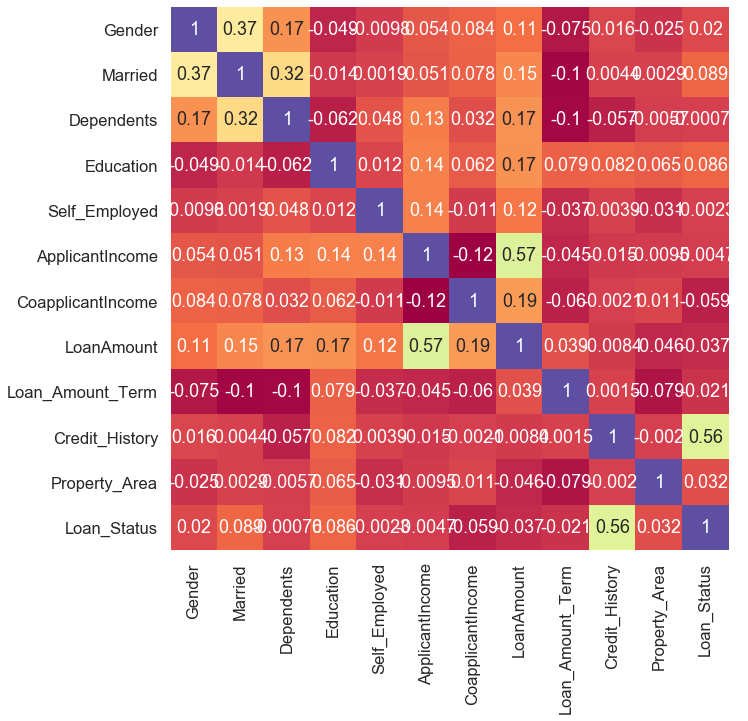

In [53]:
c = train.corr()
top_corr_features = c.index
plt.figure(figsize=(10,10))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='Spectral',cbar=False)

**Note: ** We see that the most correlated variables are
- Gender has highest correlation with Married
- Dependants has highest correlation with Married
- Self Employed has highest correlation with Applicant Income
- ApplicantIncome - LoanAmount with correlation coefficient of 0.57
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.
- Credit History is highly correlated with Loan Status 

## Data Preprocessing  

### Missing Value And Outlier Treatment


In [54]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### As gender and Married are highly correlated, so filled missing value in Gender by using married feature

In [56]:
# Missing value in Gender columns for train data
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'Yes'),'Gender']= 'Male'
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'No'),'Gender']= 'Female'

In [57]:
train_original["Gender"].isnull().sum()

0

In [58]:
# Missing value in Gender columns for test data
test.loc[(test['Gender'].isnull()) & (test['Married'] == 'Yes'),'Gender']= 'Male'
test.loc[(test['Gender'].isnull()) & (test['Married']== 'No'),'Gender']= 'Female'

In [59]:
# Missing value in MArried columns for train data
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Male"),"Married"]="Yes"
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Female"),"Married"]="No"

In [60]:
train_original['Married'].isnull().sum()

0

### Dependent

In [61]:
# Dependent
train_original['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [62]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [63]:
# fill zero in place of missing value
train_original['Dependents']= train_original['Dependents'].fillna('0')
test['Dependents']= test['Dependents'].fillna('0')

In [64]:
test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [65]:
train_original['Dependents']= train_original['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})
test['Dependents']= test['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [66]:
# Label Encoder for dependents 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_original['Dependents']= le.fit_transform(train_original['Dependents'])
test['Dependents']= le.fit_transform(test['Dependents'])

### Self employed vs Education  are highly correlated missing value filled  

In [67]:
train_original['Self_Employed'].isnull().sum()

32

In [68]:
# Missing value in Self Employed columns for train data
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original["Education"]=="Graduate"),"Self_Employed"]="No"
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [69]:
train_original['Self_Employed'].isnull().sum()

0

In [70]:
# Missing value in Self Employed columns for test data
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Graduate"),"Self_Employed"]="No"
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [71]:
test['Self_Employed'].isnull().sum()

0

In [72]:
# check whether all the missing values are filled in the Train dataset
train_original.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Outlier treatment and Detection

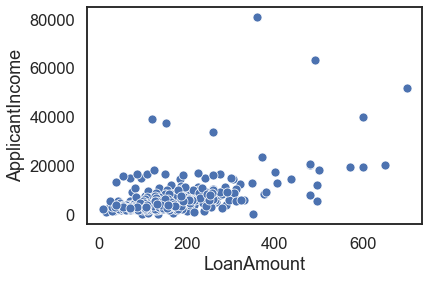

In [73]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train_original)

From Above it can be seen there is lots of out lier

In [74]:
# Outlier Detection
train_original['LoanAmount'].quantile([0.1,0.2,0.3]) #checking for outliers

0.1     71.0
0.2     95.0
0.3    108.0
Name: LoanAmount, dtype: float64

In [75]:
# Outlier Detection
train_original['LoanAmount'].quantile([1.0,0.99,0.98])

1.00    700.00
0.99    496.36
0.98    443.92
Name: LoanAmount, dtype: float64

In [76]:
train_original.drop(train_original[train_original["LoanAmount"]>496.36].index,axis=0,inplace=True) #removing outliers

In [77]:
train_original.shape

(608, 13)

### LoanAmount

Text(0.5, 1.0, 'Test')

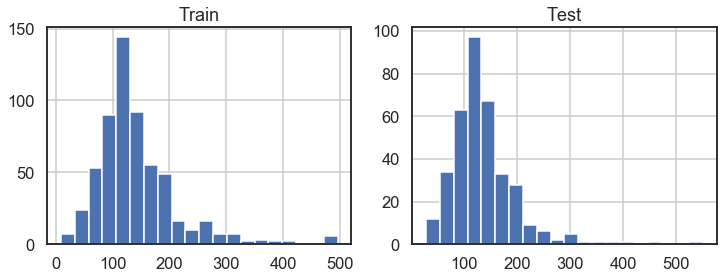

In [78]:
# before log transformation
ax1 = plt.subplot(121)
train_original['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [79]:
# Removing skewness in LoanAmount variable by log transformation
train_original['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])

In [80]:
train_original['LoanAmount'] = train_original['LoanAmount'].fillna(train_original['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [81]:
train_original['LoanAmount'].isnull().sum(), test['LoanAmount'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Test')

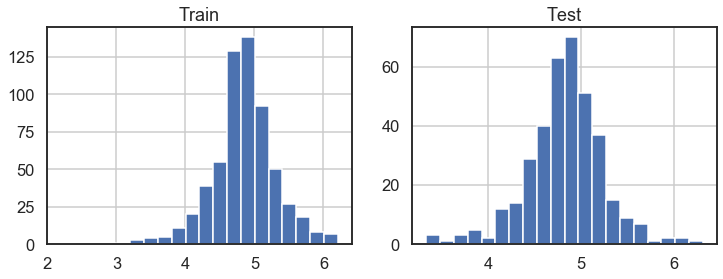

In [82]:
# after log transformation
ax1 = plt.subplot(121)
train_original['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [83]:
train_original['Loan_Amount_Term'] = train_original['Loan_Amount_Term'].fillna(360.0)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(360.0)

### Credit history and Loan Status are corelated so filled missing value using Loan Status

In [84]:
train_original.loc[(train_original["Credit_History"].isnull()) & (train_original["Loan_Status"]=="Y"),"Credit_History"]=1.0
train_original.loc[(train_original["Credit_History"].isnull()) & (train_original["Loan_Status"]=="N"),"Credit_History"]=0.0

In [85]:
test['Credit_History'] = test['Credit_History'].fillna(1.0)

# 2. Feature Engineering 

In [86]:
# combine Applicant Income and Coapplicant Income into a new variable
train_original['Total_Income'] = train_original['ApplicantIncome'] + train_original['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

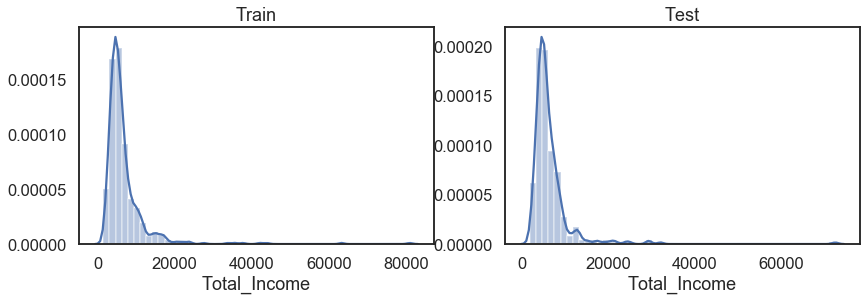

In [87]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

In [88]:
# log transformation
train_original['Total_Income_log'] = np.log(train_original['Total_Income'])
test['Total_Income_log']  =  np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

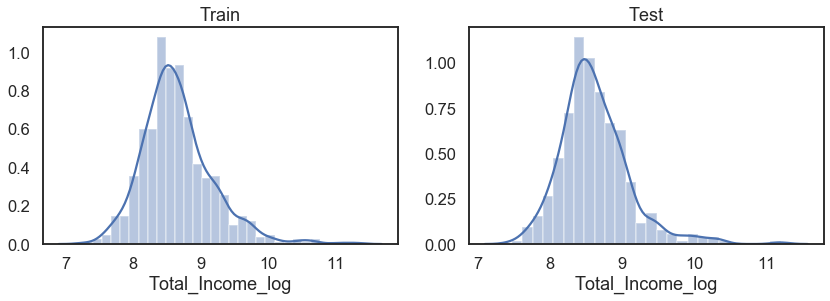

In [89]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [90]:
# create EMI feature
train_original['EMI'] = (train_original['LoanAmount']*0.09*(1.09**train_original['Loan_Amount_Term']))/(1.09**(train_original['Loan_Amount_Term']-1))
test['EMI'] = (test['LoanAmount']*0.09*(1.09**test['Loan_Amount_Term']))/(1.09**(test['Loan_Amount_Term']-1))

Text(0.5, 1.0, 'Test')

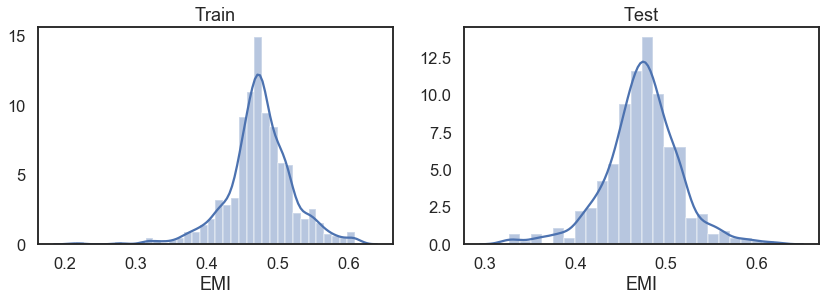

In [91]:
# check the distribution of EMI
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

# 3. Feature Selection

In [92]:
# drop the variables
train_original = train_original.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)

In [93]:
train_original.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income_log    0
EMI                 0
dtype: int64

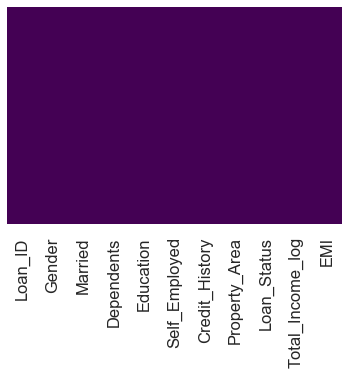

In [94]:
sns.heatmap(train_original.isnull(), yticklabels = False, cbar = False ,cmap='viridis')

We can see that all the missing values have been filled in the Train dataset as well as test dataset.

In [95]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,0.475215
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,0.475984
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,0.411005
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,0.469653
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,0.485473


In [96]:
#dropping loan id
train_df = train_original.drop(["Loan_ID"],axis=1) 

In [97]:
train_df = pd.get_dummies(train_df,drop_first=True) # one hot encoding

In [98]:
train_df.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1.0,8.674026,0.475215,1,0,0,0,0,1,1
1,1,1.0,8.714568,0.475984,1,1,0,0,0,0,0
2,0,1.0,8.006368,0.411005,1,1,0,1,0,1,1
3,0,1.0,8.505323,0.469653,1,1,1,0,0,1,1
4,0,1.0,8.699515,0.485473,1,0,0,0,0,1,1


### We are not using train test split as the dataset is too small so we'll use complete dataset for training

In [99]:
X_train = train_df.drop(["Loan_Status_Y", "Education_Not Graduate",'Self_Employed_Yes', 'Property_Area_Urban'],axis=1)
y_train = train_df["Loan_Status_Y"]
X_test=test.drop(["Loan_ID"],axis=1)

In [100]:
X_test = pd.get_dummies(X_test,drop_first=True)

### Removing "Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban' from test data as well

In [101]:
X_test = X_test.drop(["Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban'],axis=1)

### Finally lets have Final look over X_train, y_train, X_test shape

In [102]:
X_train.shape,y_train.shape, X_test.shape

((608, 7), (608,), (367, 7))

In [103]:
X_train.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.674026,0.475215,1,0,0
1,1,1.0,8.714568,0.475984,1,1,0
2,0,1.0,8.006368,0.411005,1,1,0
3,0,1.0,8.505323,0.469653,1,1,0
4,0,1.0,8.699515,0.485473,1,0,0


In [104]:
X_test.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.651724,0.461117,1,1,0
1,1,1.0,8.428581,0.474439,1,1,0
2,2,1.0,8.824678,0.523612,1,1,0
3,2,1.0,8.494129,0.451767,1,1,0
4,0,1.0,8.094378,0.427393,1,0,0


# 4. Model Selection

In [105]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1. Logistic Regression

In [106]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, n_jobs=1, scoring=scoring)
print(score)

[0.8442623  0.80327869 0.79508197 0.87603306 0.85123967]


In [107]:
round(np.mean(score)*100, 2)

83.4

# 2. K-Nearest Neighbour

In [108]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [109]:
clf = KNeighborsClassifier(n_neighbors = 25)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.83606557 0.80327869 0.75409836 0.8852459  0.85245902
 0.73770492 0.7704918  0.81666667 0.78333333]


In [110]:
# kNN Score
round(np.mean(score)*100, 2)

79.93

# 3. Decision Tree

In [111]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.72131148 0.72131148 0.73770492 0.7704918  0.75409836 0.72131148
 0.63934426 0.70491803 0.81666667 0.76666667]


In [112]:
# decision tree Score
round(np.mean(score)*100, 2)

73.54

# 4. Random Forest

In [113]:
clf = RandomForestClassifier(n_estimators=25)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.75409836 0.85245902 0.81967213 0.7704918  0.85245902 0.86885246
 0.75409836 0.73770492 0.88333333 0.8       ]


In [114]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.93

# 5. Naive Bayes

In [115]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.8852459  0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [116]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

83.23

# 6. Support Vector Classifier

In [117]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.90163934 0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [118]:
round(np.mean(score)*100,2)

83.4

## Testing 

In [119]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
#test_data = test.drop( "Loan_ID", axis=1).copy()
prediction = clf.predict(X_test)

### Preparing For the Submission

In [120]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": prediction
    })

In [121]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [122]:
submission.to_csv('submission.csv', index=False)

In [123]:
submission = pd.read_csv('submission.csv')
submission[0:10]

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y
